In [1]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import HTML
HTML('<style>em { color: red; }</style>')

In [2]:
# import statements
import sqlite3
import pandas as pd
import os

## Warmup: SQL query clauses
**Mandatory SQL clauses**
- SELECT: column, column, ...  or *
- FROM: table

**Optional SQL clauses**
- WHERE:  boolean expression (if row has ....)
 - can use AND, OR, NOT
- ORDER BY  column (ASC, DESC)
- LIMIT: num rows

In [8]:
# open up the movies database
movies_path = "movies.db"
assert os.path.exists(movies_path)
c = sqlite3.connect(movies_path)

In [4]:
# what are the table names?
df = pd.read_sql("select * from sqlite_master where type='table'", c)
df

type    name tbl_name  rootpage  \
0  table  movies   movies         2   

                                                 sql  
0  CREATE TABLE "movies" (\n"Title" TEXT,\n  "Gen...

In [5]:
# what are the data types?
print(df["sql"].iloc[0])

CREATE TABLE "movies" (
"Title" TEXT,
  "Genre" TEXT,
  "Director" TEXT,
  "Cast" TEXT,
  "Year" INTEGER,
  "Runtime" INTEGER,
  "Rating" REAL,
  "Revenue" REAL
)


In [6]:
# what is all our data?
pd.read_sql("select * from movies", c)

Title                         Genre  \
0            Guardians of the Galaxy       Action,Adventure,Sci-Fi   
1                         Prometheus      Adventure,Mystery,Sci-Fi   
2                              Split               Horror,Thriller   
3                               Sing       Animation,Comedy,Family   
4                      Suicide Squad      Action,Adventure,Fantasy   
...                              ...                           ...   
1063  Guardians of the Galaxy Vol. 2     Action, Adventure, Comedy   
1064                     Baby Driver          Action, Crime, Drama   
1065                  Only the Brave      Action, Biography, Drama   
1066                   Incredibles 2  Animation, Action, Adventure   
1067                  A Star Is Born         Drama, Music, Romance   

                  Director                                               Cast  \
0               James Gunn  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
1             Ridley Scott  Noomi Rapace, Logan Marshall-Green, Michael   ...   
2       M. Night Shyamalan  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
3     Christophe Lourdelet  Matthew McConaughey,Reese Witherspoon, Seth Ma...   
4               David Ayer  Will Smith, Jared Leto, Margot Robbie, Viola D...   
...                    ...                                                ...   
1063            James Gunn  Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...   
1064          Edgar Wright  Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...   
1065       Joseph Kosinski  Josh Brolin, Miles Teller, Jeff Bridges, Jenni...   
1066             Brad Bird  Craig T. Nelson, Holly Hunter, Sarah Vowell, H...   
1067        Bradley Cooper  Lady Gaga, Bradley Cooper, Sam Elliott, Greg G...   

      Year  Runtime  Rating  Revenue  
0     2014      121     8.1   333.13  
1     2012      124     7.0   126.46  
2     2016      117     7.3   138.12  
3     2016      108     7.2   270.32  
4     2016      123     6.2   325.02  
...    ...      ...     ...      ...  
1063  2017      136     7.6   389.81  
1064  2017      113     7.6   107.83  
1065  2017      134     7.6    18.34  
1066  2018      118     7.6   608.58  
1067  2018      136     7.6   215.29  

[1068 rows x 8 columns]

In [7]:
# this function allows to type less for each query
def qry(sql, conn = c):
    return pd.read_sql(sql, conn)

Sample query format:

```
SELECT
FROM movies
WHERE
ORDER BY
LIMIT
```

In [8]:
# call qry ....copy/paste the query from above
qry("""
SELECT *
FROM movies
""")

Title                         Genre  \
0            Guardians of the Galaxy       Action,Adventure,Sci-Fi   
1                         Prometheus      Adventure,Mystery,Sci-Fi   
2                              Split               Horror,Thriller   
3                               Sing       Animation,Comedy,Family   
4                      Suicide Squad      Action,Adventure,Fantasy   
...                              ...                           ...   
1063  Guardians of the Galaxy Vol. 2     Action, Adventure, Comedy   
1064                     Baby Driver          Action, Crime, Drama   
1065                  Only the Brave      Action, Biography, Drama   
1066                   Incredibles 2  Animation, Action, Adventure   
1067                  A Star Is Born         Drama, Music, Romance   

                  Director                                               Cast  \
0               James Gunn  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
1             Ridley Scott  Noomi Rapace, Logan Marshall-Green, Michael   ...   
2       M. Night Shyamalan  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
3     Christophe Lourdelet  Matthew McConaughey,Reese Witherspoon, Seth Ma...   
4               David Ayer  Will Smith, Jared Leto, Margot Robbie, Viola D...   
...                    ...                                                ...   
1063            James Gunn  Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...   
1064          Edgar Wright  Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...   
1065       Joseph Kosinski  Josh Brolin, Miles Teller, Jeff Bridges, Jenni...   
1066             Brad Bird  Craig T. Nelson, Holly Hunter, Sarah Vowell, H...   
1067        Bradley Cooper  Lady Gaga, Bradley Cooper, Sam Elliott, Greg G...   

      Year  Runtime  Rating  Revenue  
0     2014      121     8.1   333.13  
1     2012      124     7.0   126.46  
2     2016      117     7.3   138.12  
3     2016      108     7.2   270.32  
4     2016      123     6.2   325.02  
...    ...      ...     ...      ...  
1063  2017      136     7.6   389.81  
1064  2017      113     7.6   107.83  
1065  2017      134     7.6    18.34  
1066  2018      118     7.6   608.58  
1067  2018      136     7.6   215.29  

[1068 rows x 8 columns]

### What's the *Title* of the movie with the highest *Rating*?

In [9]:
df = qry("""
SELECT Title, Rating
FROM movies
ORDER BY Rating DESC
LIMIT 1
""")
df

Title  Rating
0  The Dark Knight     9.0

In [10]:
df.iloc[0]["Title"]

'The Dark Knight'

### Which *Director* made the movie with the shortest *Runtime*?

In [11]:
df = qry("""
SELECT Director, Runtime
FROM movies
ORDER BY Runtime
LIMIT 1
""")
df

Director  Runtime
0  Claude Barras       66

In [12]:
df.iloc[0]["Director"]

'Claude Barras'

### What was the *Director*  and *Title* of the movie with the largest *Revenue*?

In [13]:
qry("""
SELECT director, revenue, title
FROM movies
ORDER BY revenue DESC
LIMIT 1
""")

Director  Revenue                                       Title
0  J.J. Abrams   936.63  Star Wars: Episode VII - The Force Awakens

### What is the *Title* of the movie with the highest *Revenue* in *Year* 2019?

In [14]:
df = qry("""
SELECT title, revenue, year
FROM movies
WHERE year = 2019
ORDER BY revenue DESC
LIMIT 1
""")
df

Title  Revenue  Year
0  Avengers: Endgame   858.37  2019

In [15]:
df.iloc[0]["Title"]

'Avengers: Endgame'

### Which *3 movies*  had the top-3 highest *Revenue* in the *Year* 2019?

In [16]:
df = qry("""
SELECT title, revenue
FROM movies
WHERE year = 2019
ORDER BY revenue DESC
LIMIT 3
""")
df

Title  Revenue
0  Avengers: Endgame   858.37
1        Toy Story 4   434.04
2              Joker   335.45

In [17]:
# Extract title column and convert to list
list(df["Title"])

['Avengers: Endgame', 'Toy Story 4', 'Joker']

## Lecture 33: Database 2
Learning Objectives:
- Use the AS command to rename a column or a calculation
- Use SQL Aggregate functions to summarize database columns: 
 - SUM, AVG, COUNT, MIN, MAX, DISTINCT
- Use the GROUP BY command to place database rows into buckets.
- Use the HAVING command to apply conditions to groups.

### Which *3 movies* have the highest *rating-to-revenue ratios*?

The `AS` clause lets us rename a column or a calcuation

In [18]:
qry("""
SELECT title, rating / revenue AS ratio
FROM movies
ORDER BY ratio DESC
LIMIT 3
""")

Title  ratio
0    Wakefield  750.0
1  Love, Rosie  720.0
2     Lovesong  640.0

## Aggregate Queries

```
SUM, AVG, COUNT, MIN, MAX, DISTINCT
```

### How many *rows of movies* are there?
Note: when we want to count the number of rows, we use COUNT(*)

In [19]:
qry("""
SELECT COUNT(*)
FROM movies
""")

COUNT(*)
0      1068

### How many *directors* are there?

In [20]:
qry("""
SELECT COUNT(director)
FROM movies
""")
# This doesn't feel correct - it counts duplicates for director names!

COUNT(director)
0             1068

Use COUNT(DISTINCT columname) 

In [21]:
qry("""
SELECT COUNT(DISTINCT director)
FROM movies
""")

COUNT(DISTINCT director)
0                       679

### What are the names of the *directors* (without duplicates)?

In [22]:
df = qry("""
SELECT DISTINCT director
FROM movies
""")
df

Director
0               James Gunn
1             Ridley Scott
2       M. Night Shyamalan
3     Christophe Lourdelet
4               David Ayer
..                     ...
674     Andrey Zvyagintsev
675             Sean Baker
676  Destin Daniel Cretton
677           Tyler Nilson
678         Bradley Cooper

[679 rows x 1 columns]

In [23]:
# Extract Director column and convert to list
director_list = list(df["Director"]) 
#director_list # uncomment to see the output

### What is the total *Revenue* of *all the movies*?

In [24]:
qry("""
SELECT SUM(revenue)
FROM movies
""")

SUM(revenue)
0      80668.27

### What is the *average rating* across *all movies*?

* v1: with `SUM` and `COUNT`
* v2: with `AVG`

In [25]:
# v1
df = qry("""
SELECT SUM(rating) / COUNT(*)
FROM movies
""")
df

SUM(rating) / COUNT(*)
0                6.805431

In [26]:
df.iloc[0][0]

6.805430711610491

In [27]:
# v2
qry("""
SELECT AVG(rating)
FROM movies
""")

AVG(rating)
0     6.805431

### What is the *average revenue* and *average runtime* of *all the movies*?

In [28]:
qry("""
SELECT AVG(revenue), AVG(runtime)
FROM movies
""")

AVG(revenue)  AVG(runtime)
0     75.532088    114.093633

### What is the *average revenue* for a *Ridley Scott* movie?

In [29]:
df = qry("""
SELECT AVG(revenue)
FROM movies
WHERE director = "Ridley Scott"
""")
df

AVG(revenue)
0       89.8825

In [30]:
df.iloc[0][0]

89.88250000000001

### *How many movies* were there in *2019*?

In [31]:
df = qry("""
SELECT COUNT(*)
FROM movies
WHERE year = 2019
""")
df

COUNT(*)
0        23

In [32]:
df.iloc[0][0]

23

### What *percentage* of the *total revenue* came from the *highest-revenue movie*?

In [33]:
df = qry("""
SELECT title, MAX(revenue) / SUM(revenue) * 100 AS percentage
FROM movies
""")
df

Title  percentage
0  Star Wars: Episode VII - The Force Awakens    1.161088

In [34]:
df.iloc[0][0]

'Star Wars: Episode VII - The Force Awakens'

### What *percentage* of the *revenue* came from the *highest-revenue movie* in *2019*?

In [35]:
qry("""
SELECT title, MAX(revenue) / SUM(revenue) * 100 AS percentage
FROM movies
WHERE year = 2019
""")

Title  percentage
0  Avengers: Endgame    32.19777

# GROUP BY Queries

```sql
SELECT ???, ??? FROM Movies
GROUP BY ???
```

Sample query format:

```
SELECT 
FROM movies
WHERE 
GROUP BY 
ORDER BY
LIMIT
```

### What is the *total revenue* for each *year*?

In [36]:
qry("""
SELECT year, SUM(revenue)
FROM movies
GROUP BY year
""")

Year  SUM(revenue)
0   2006       3624.46
1   2007       4306.23
2   2008       5053.22
3   2009       5292.26
4   2010       5989.65
5   2011       5431.96
6   2012       6910.29
7   2013       7544.21
8   2014       7997.40
9   2015       8854.12
10  2016      11211.65
11  2017       2086.58
12  2018       2675.12
13  2019       2665.93
14  2020       1025.19

### *How many movies* were directed by the top-10 *director*s?

In [37]:
qry("""
SELECT director, COUNT(*) AS mov_count
FROM movies
GROUP BY director
ORDER BY mov_count DESC
limit 10
""") 

Director  mov_count
0        Ridley Scott          8
1  Paul W.S. Anderson          6
2         Michael Bay          6
3     Martin Scorsese          6
4  M. Night Shyamalan          6
5    Denis Villeneuve          6
6         David Yates          6
7   Christopher Nolan          6
8         Zack Snyder          5
9         Woody Allen          5

### What is the *average rating* for each *director*?

In [38]:
qry("""
SELECT director, AVG(rating)
FROM movies
GROUP BY director
""")

Director  AVG(rating)
0             Aamir Khan         8.50
1           Aaron Sorkin         7.80
2    Abdellatif Kechiche         7.80
3              Adam Leon         6.50
4             Adam McKay         7.00
..                   ...          ...
674          Yimou Zhang         6.10
675     Yorgos Lanthimos         7.20
676          Zack Snyder         7.04
677        Zackary Adler         5.10
678          Zoya Akhtar         8.00

[679 rows x 2 columns]

### How many *unique directors* created a movie in each *year*?

In [39]:
qry("""
SELECT year, COUNT(DISTINCT director) AS director_count
FROM movies
GROUP BY year
""")

Year  director_count
0   2006              44
1   2007              51
2   2008              51
3   2009              51
4   2010              60
5   2011              63
6   2012              64
7   2013              88
8   2014              97
9   2015             127
10  2016             289
11  2017              22
12  2018              19
13  2019              23
14  2020               6

## Combining GROUP BY with other CLAUSES

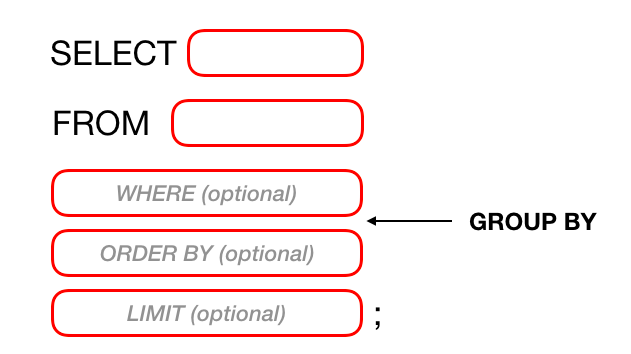

### What is the *total revenue* per *year*, in *recent* years (last 5 years)?

In [45]:
qry("""
SELECT year, SUM(revenue) AS total_revenue
FROM movies
GROUP BY Year
ORDER BY Year DESC
LIMIT 5
""")

Year  total_revenue
0  2020        1025.19
1  2019        2665.93
2  2018        2675.12
3  2017        2086.58
4  2016       11211.65

### Which 5 *directors* have had the *most number of movies* earning *over 200M dollars*?

In [41]:
qry("""
SELECT director, COUNT(title) AS count
FROM movies
WHERE revenue > 200
GROUP BY director
ORDER BY count DESC
limit 5
""")

Director  count
0       David Yates      5
1       Michael Bay      4
2  Francis Lawrence      4
3     Anthony Russo      4
4       Zack Snyder      3

### Which *three directors* have the *greatest average rating*?

In [42]:
qry("""
SELECT director, AVG(rating) AS avg_rating
FROM movies
GROUP BY director
ORDER BY avg_rating DESC
LIMIT 3
""")

Director  avg_rating
0      Thomas Kail         8.6
1    Sudha Kongara         8.6
2  Olivier Nakache         8.6

Why is the above question maybe not the best to ask?

In [43]:
# These directors could have made just 1 good movie.
# We would want to consider if the director has multiple great movies, instead of just one.

### Which *five directors* have the *greatest average rating* over at *least three movies*?

Can you solve this question just using `GROUPBY` and `WHERE`?

Answer: We cannot use WHERE clause on aggregates because that data doesn't exist in the original table

In [44]:
# This query wouldn't work

# qry("""
# SELECT director, AVG(rating) AS avg_rating, COUNT(*) as count
# FROM movies
# WHERE count >= 3
# GROUP BY director
# ORDER BY avg_rating DESC
# LIMIT 3
# """)

Need filtering BEFORE and AFTER the GROUP operations
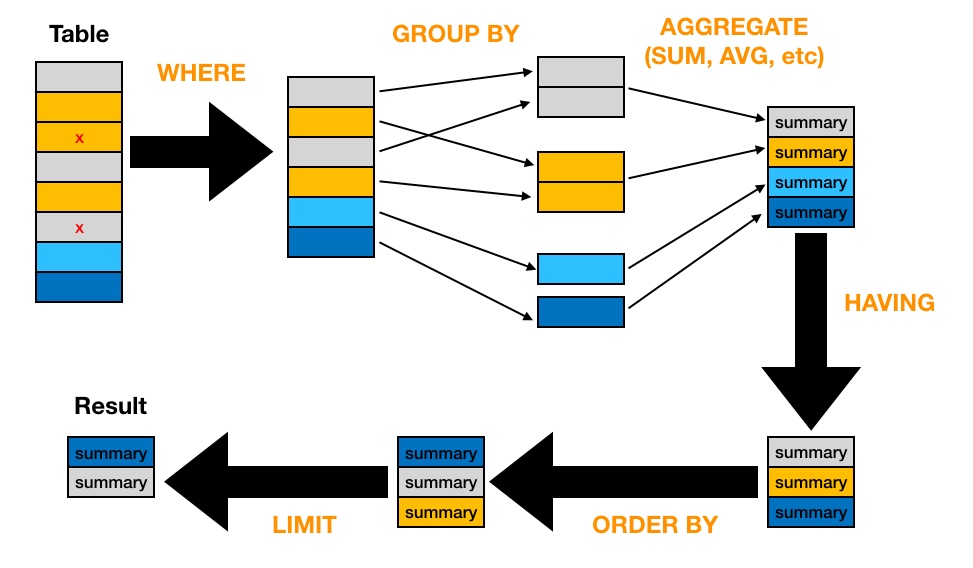

# WHERE vs. HAVING

* WHERE: filter rows in original table
* HAVING: filter groups

### Which *five* directors *have at least 3 movies* that score the *greatest average rating* ?

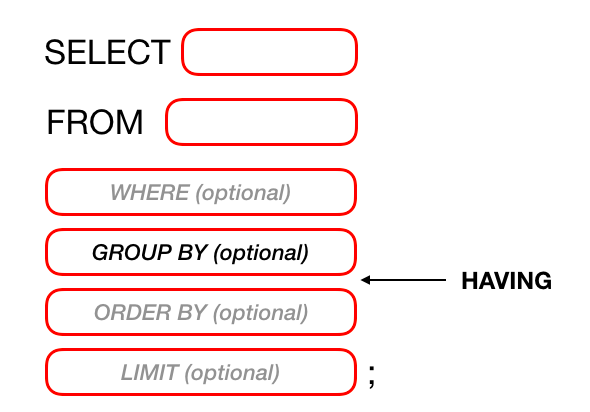

### SQL query sample format (with all main clauses - both mandatory and optional)

```
SELECT 
FROM movies
WHERE 
GROUP BY 
HAVING
ORDER BY
LIMIT
```

In [45]:
qry("""
SELECT director, AVG(rating) AS avg_rating, COUNT(*) as count
FROM movies
GROUP BY director
HAVING count >= 3
ORDER BY avg_rating DESC
LIMIT 3
""")

Director  avg_rating  count
0  Christopher Nolan    8.533333      6
1        Pete Docter    8.200000      3
2      Anthony Russo    8.125000      4

### Which *directors* have had *more than 3 movies* that have been released *since 2010*?

In [46]:
qry("""
SELECT director, COUNT(title) AS count
FROM movies
WHERE year >= 2010
GROUP BY director
HAVING count > 3
""")

Director  count
0        Anthony Russo      4
1        Antoine Fuqua      4
2    Christopher Nolan      4
3     David O. Russell      4
4          David Yates      4
5     Denis Villeneuve      6
6            James Wan      4
7   M. Night Shyamalan      4
8      Martin Scorsese      5
9          Michael Bay      4
10       Mike Flanagan      4
11           Paul Feig      4
12  Paul W.S. Anderson      5
13          Peter Berg      4
14        Ridley Scott      5
15         Woody Allen      4

### Which *directors* have more than *two* movies with runtimes under *100* minutes?

In [47]:
qry("""
SELECT director, COUNT(title) AS count
FROM movies
WHERE runtime < 100
GROUP BY director
HAVING count > 2
""")

Director  count
0     Mike Flanagan      3
1  Nicholas Stoller      3
2      Wes Anderson      3
3       Woody Allen      4

In [48]:
# Don't forget to close the movies.db connection
c.close()